In [39]:
import numpy as np
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import dill

In [72]:
# read data
data = pd.read_csv(r'C:\Users\HP\Desktop\ISEP2\Semestre2\Machine Learning\Projet\Codes\Notebooks\tweets.csv')

In [73]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [43]:
data.describe(include="all")

,id,keyword,location,text,target
count,11370.000000,11370,7952,11370,11370.000000
unique,NaN,219,4504,11223,NaN
top,NaN,thunderstorm,United States,I want to help you with my project to save the...,NaN
freq,NaN,93,96,3,NaN
mean,5684.500000,NaN,NaN,NaN,0.185928
std,3282.380615,NaN,NaN,NaN,0.389066
min,0.000000,NaN,NaN,NaN,0.000000
25%,2842.250000,NaN,NaN,NaN,0.000000
50%,5684.500000,NaN,NaN,NaN,0.000000
75%,8526.750000,NaN,NaN,NaN,0.000000


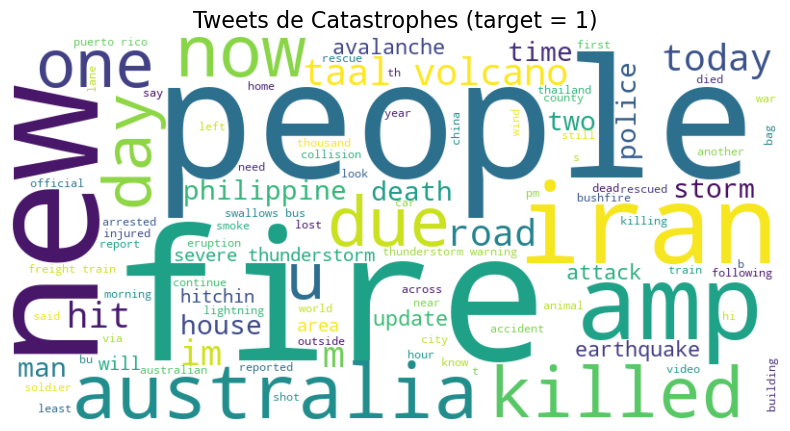

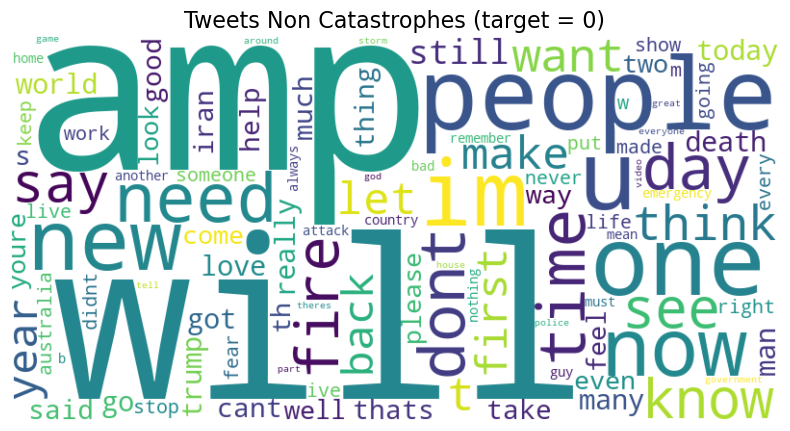

In [46]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re



# Nettoyage de texte basique
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Retirer les liens
    text = re.sub(r"[^a-z\s]", "", text)  # Garder uniquement les lettres
    return text

# Appliquer le nettoyage
df = data
df['clean_text'] = df['text'].apply(clean_text)
# Séparer par classe
disaster_tweets = df[df['target'] == 1]['clean_text']
non_disaster_tweets = df[df['target'] == 0]['clean_text']

# Fonction pour créer un nuage de mots
def generate_wordcloud(texts, title):
    text_combined = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, max_words=100).generate(text_combined)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Nuage de mots pour les tweets de catastrophe
generate_wordcloud(disaster_tweets, "Tweets de Catastrophes (target = 1)")

# Nuage de mots pour les tweets non liés à une catastrophe
generate_wordcloud(non_disaster_tweets, "Tweets Non Catastrophes (target = 0)")


In [47]:
data['location'].sample(20)

1656                  Connecticut, USA
5146                     ♡ALLAH&RASUL♡
6994    occupied Ohlone and Yokut land
2432        Johannesburg, South Africa
3611                   Ilorin, Nigeria
7862                     𝐓𝐡𝐞 𝐠𝐚𝐲 𝐡𝐨𝐮𝐬𝐞
7102                               NaN
7843                               NaN
4107                               NaN
9233               South West, England
1817                     Vancouver, BC
9915                       multifandom
9157                               NaN
2866                               NaN
1797                         Newcastle
1972                               NaN
427                                NaN
642                     Ksabadi, Korba
1957     Gippsland Victoria, Australia
1005                               NaN
Name: location, dtype: object

In [48]:
data['text'].sample(10)

3617     Rick Wilson is a Republican ad man with ties t...
10156        Is Thunder Twitter the best of #NBATwitter ??
1434     It's not my fight. If it was up to me we'd giv...
3161     We are deeply saddened by the death of His Maj...
7343     #1495Days Since #ZariaMassacre and the unlawfu...
5178     President Muhammadu Buhari has expressed deep ...
8516     This is actually power of left-wingers, who pr...
4936     The response to Australia’s fire crisis has so...
3598     Meta meta will as usual derail in his despotic...
10678    Schools should brace for five years of upheava...
Name: text, dtype: object

In [49]:
for i, text in data['text'].sample(10).items():
    print(f"{i}: {text}\n")

4339: dont drown

5046: 1️⃣4️⃣9️⃣ AUSTRALIA URGES MASS EVACUATION 🔥 Australia urging some 240,000 citizens to evacuate. 🔥 Seems “bushfires” may b…

3119: #FlagNotice: The Australian Flag will be flown at half-mast, Tuesday 14 January, as a mark of mourning and respect on the d…

623: I feel attacked. https://t.co/jy5jPhzhEy

1903: We are not burning. We are just concerned about our mothers daughters and sisters who… https://t.co/58wNcO8D5k

6136: What does quoted replies do? What is it’s function?

4515: Boy, 9, saves grandmother from drowning in bath when she had a seizure after learning life-saving skills on YouTube https:…

6568: The security forces of Nigeria are working continuously to return those taken hostage by Boko Haram to their families, friend…

3088: Avalanches in #Pakistan kill 57 people https://t.co/JgrUDpMet3

2170: Muslim Teen Laughs After Appearing in Court for Setting Fires. Yep! Muslims set the catastrophic fires in Australia. What…



### Missing values

In [50]:
print(data.isna().sum()) 

id               0
keyword          0
location      3418
text             0
target           0
clean_text       0
dtype: int64


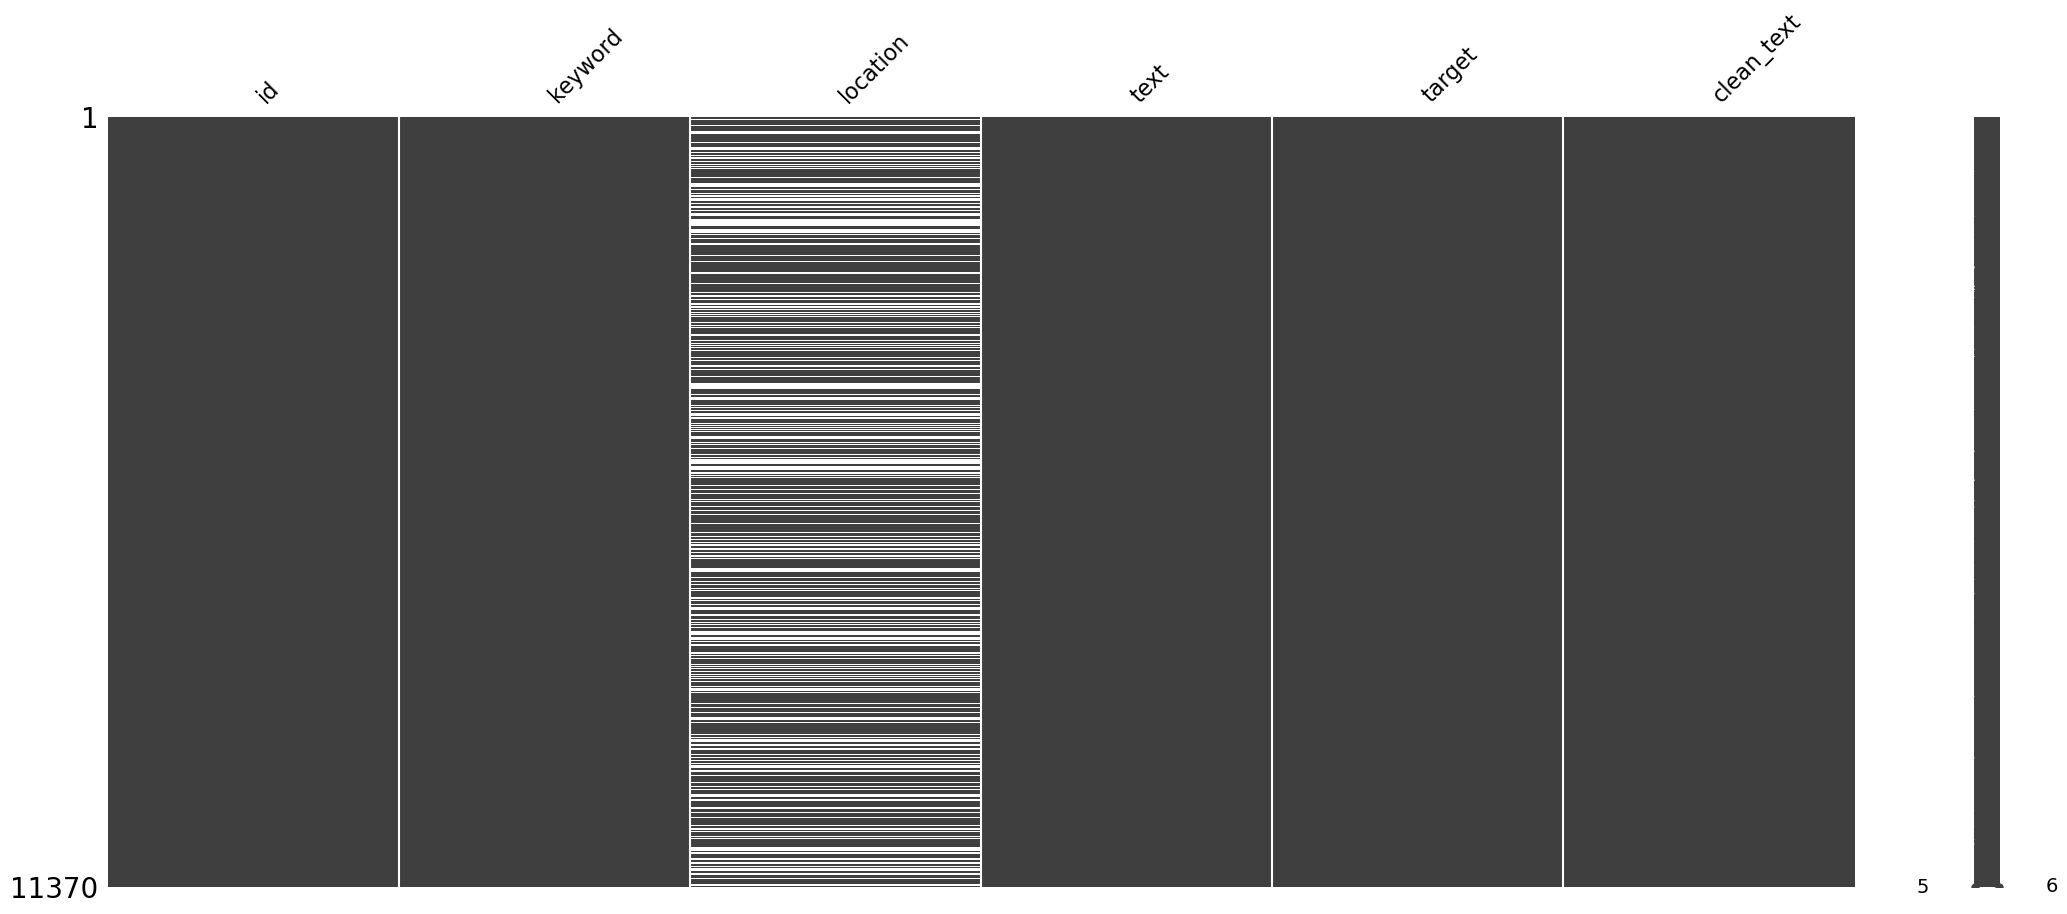

In [51]:
msno.matrix(data);

### Value Cout By Column

In [52]:
print(data.nunique()); print('\ntotal row number is:', data.shape[0])

id            11370
keyword         219
location       4504
text          11223
target            2
clean_text    10944
dtype: int64

total row number is: 11370


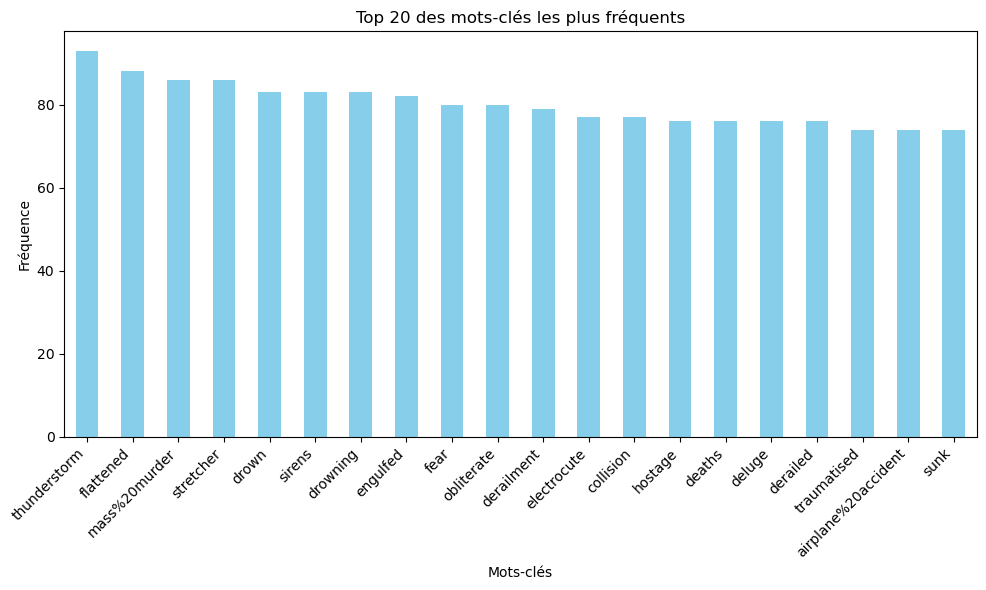

In [53]:

top_keywords = data['keyword'].value_counts()[:20]

plt.figure(figsize=(10,6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title('Top 20 des mots-clés les plus fréquents')
plt.xlabel('Mots-clés')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajuste le positionnement pour éviter les chevauchements
plt.show()


 ### Value counts in target 

In [54]:
label_distribution = data.groupby(['target']).size().reset_index(name='count')
label_distribution

,target,count
0,0,9256
1,1,2114


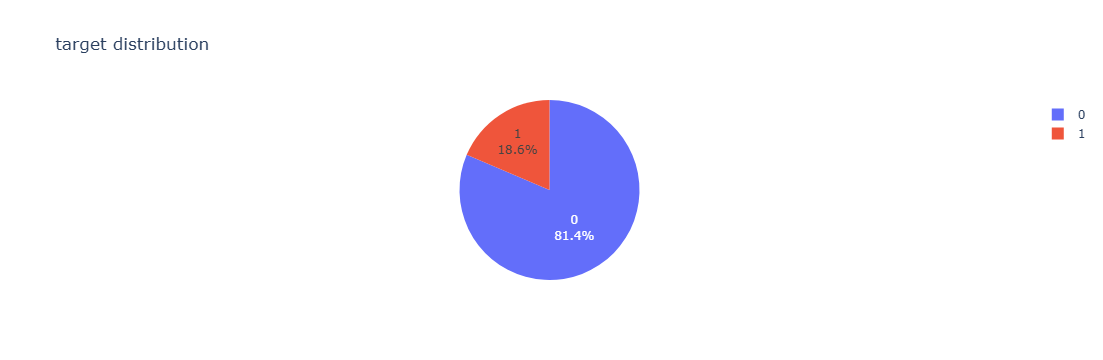

In [55]:
# Plot a pie chart with custom colors for target
fig = px.pie(
    label_distribution, 
    names='target',  # Use 'target' for pie segments
    values='count',  # Use 'count' for the size of each pie slice
    # color='target',  # Color the segments based on target
    title='target distribution',
    labels={'target': 'target', 'count': 'Count'},
)

fig.update_traces(textinfo='percent+label')  # Display percentage and labels on the pie chart

fig.show()

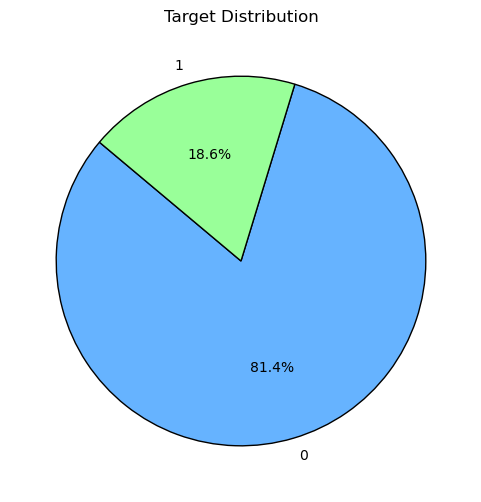

In [75]:
import matplotlib.pyplot as plt

# Définir les couleurs personnalisées (tu peux les modifier)
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Tracer le graphique en camembert
plt.figure(figsize=(6, 6))
plt.pie(
    label_distribution['count'], 
    labels=label_distribution['target'], 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Ajouter un titre
plt.title('Target Distribution')
plt.show()


In [56]:
# pip install spacy

In [57]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_location_spacy(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE = Geo-Political Entity (pays, ville...)
            return ent.text.lower()
    return "unknown"

data['geo_entity_spacy'] = data['location'].fillna("").apply(extract_location_spacy)


In [58]:
data['has_geo'] = data['geo_entity_spacy'].apply(lambda x: 0 if x == "unknown" else 1)

In [59]:
data

,id,keyword,location,text,target,clean_text,geo_entity_spacy,has_geo
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...,unknown,0
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section has been imposed in bhainsa...,unknown,0
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership,new york city,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership,morgantown,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...,unknown,0
...,...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,media should have warned us well in advance th...,unknown,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,unknown,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,unknown,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok who remember outcast nd the dora au those a...,unknown,0


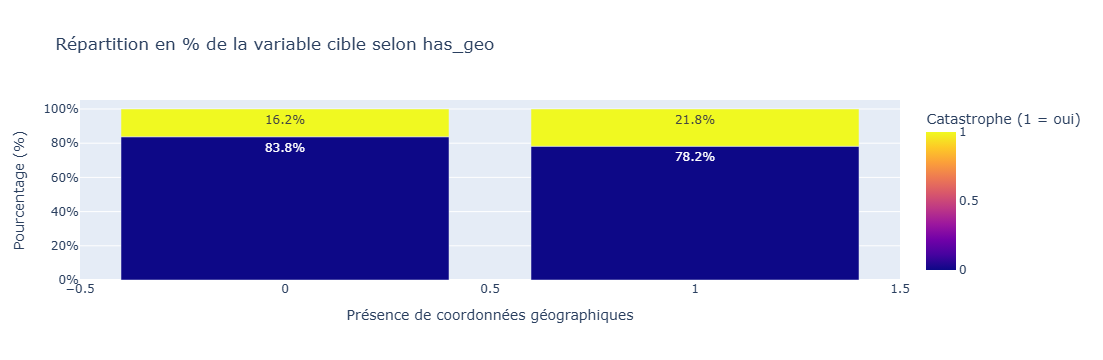

In [60]:
import pandas as pd
import plotly.express as px

# 1. Compter le nombre d'observations pour chaque combinaison has_geo / target
counts = data.groupby(['has_geo', 'target']).size().reset_index(name='count')

# 2. Calculer les pourcentages par modalité de has_geo
counts['percent'] = counts['count'] / counts.groupby('has_geo')['count'].transform('sum') * 100

# 3. Tracer le graphique en barres empilées
fig = px.bar(counts, 
             x='has_geo', 
             y='percent', 
             color='target', 
             barmode='stack',
             text=counts['percent'].round(1).astype(str) + '%',
             title='Répartition en % de la variable cible selon has_geo',
             labels={
                 'percent': 'Pourcentage (%)',
                 'has_geo': 'Présence de coordonnées géographiques',
                 'target': 'Catastrophe (1 = oui)'
             })

fig.update_layout(yaxis_ticksuffix='%')
fig.show()


In [37]:
correlation = data[['has_geo', 'target']].corr(method='pearson')
correlation

,has_geo,target
has_geo,1.00000,0.07037
target,0.07037,1.00000


In [62]:
import pandas as pd
from scipy.stats import chi2_contingency

# Table croisée
table = pd.crosstab(data['has_geo'], df['target'])

# Test du chi²
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2}, p-value = {p}")


Chi2 = 55.93781473450656, p-value = 7.479990690924942e-14


In [64]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

conf_matrix = pd.crosstab(data['has_geo'], data['target'])
cramers_v(conf_matrix)


0.07014109083816102

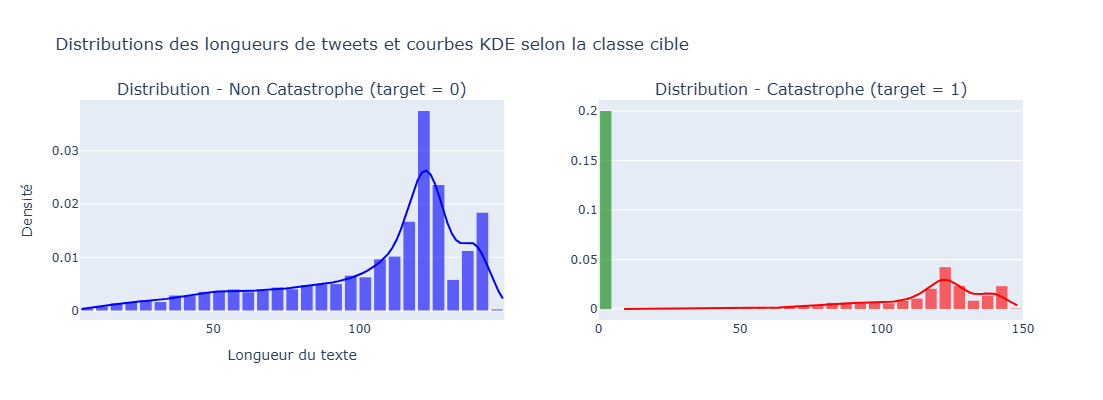

In [70]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Ajout de la longueur de chaque tweet
df['text_length'] = df['text'].apply(len)

# Filtrage selon la cible
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Fonction pour calculer la densité KDE
def kde_estimation(data, num_points=100):
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), num_points)
    y = kde(x)
    return x, y

# Création d'une figure à 2 sous-graphes
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Distribution - Non Catastrophe (target = 0)",
    "Distribution - Catastrophe (target = 1)"
))

# Histogramme et KDE pour target = 0
fig.add_trace(go.Histogram(
    x=df_0['text_length'],
    name='Target = 0',
    marker_color='blue',
    opacity=0.6,
    nbinsx=50,
    histnorm='probability density',
    showlegend=False
), row=1, col=1)

# Calcul de la courbe KDE pour target = 0
x_0, y_0 = kde_estimation(df_0['text_length'])
fig.add_trace(go.Scatter(
    x=x_0, y=y_0,
    mode='lines', name='KDE Target = 0',
    line=dict(color='blue', width=2),
    showlegend=False
), row=1, col=1)

# Histogramme et KDE pour target = 1
fig.add_trace(go.Histogram(
    x=df_1['text_length'],
    name='Target = 1',
    marker_color='red',
    opacity=0.6,
    nbinsx=50,
    histnorm='probability density',
    showlegend=False
), row=1, col=2)

# Calcul de la courbe KDE pour target = 1
x_1, y_1 = kde_estimation(df_1['text_length'])
fig.add_trace(go.Scatter(
    x=x_1, y=y_1,
    mode='lines', name='KDE Target = 1',
    line=dict(color='red', width=2),
    showlegend=False
), row=1, col=2)

# Log-transformation pour target = 1 (filtrage des valeurs <= 0)
df_1_filtered = df_1[df_1['text_length'] > 0]  # Filtrer les valeurs <= 0
fig.add_trace(go.Histogram(
    x=np.log(df_1_filtered['text_length']),  # Appliquer log seulement après filtrage
    name='Target = 1 (Log)',
    marker_color='green',
    opacity=0.6,
    nbinsx=50,
    histnorm='probability density',
    showlegend=False
), row=1, col=2)

# Mise en forme du layout
fig.update_layout(
    title_text='Distributions des longueurs de tweets et courbes KDE selon la classe cible',
    xaxis_title='Longueur du texte',
    yaxis_title='Densité',
    bargap=0.2,
    width=1000,
    height=400
)

fig.show()


### Train / Test split 

In [30]:
x = data.drop(columns=['target', 'location', 'geo_entity_spacy', 'id',])  
y = data.target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#### Sauvegarde

In [36]:
chemin = r'C:\Users\HP\Desktop\ISEP2\Semestre2\Machine Learning\Projet\Models\train_test_split.dill'
with open(chemin, 'wb') as f:
    dill.dump((x_train, x_test, y_train, y_test), f)

# 1. Découpage en 70% train, 15% val, 15% test
x_train_full, x_temp, y_train_full, y_temp = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# 2. Sauvegarde groupée
chemin = r'C:\Users\HP\Desktop\ISEP2\Semestre2\Machine Learning\Projet\Models\train_val_test_split.dill'

with open(chemin, 'wb') as f:
    dill.dump((x_train_full, x_val, x_test, y_train_full, y_val, y_test), f)

print("✅ Fichier .dill sauvegardé avec succès :", chemin)
